### **Portfolio Optimisation (Mean-Variance Optimal Portfolio)**: 
You have a set of stocks in your portfolio, and you want to adjust their weights to maximize your return per unit of risk. This is known as a Mean-Variance optimal portfolio. To find these weights we'll have to:

1- Estimate the expected return for each stock and the variance-covariance matrix of all our stocks' returns. 

2- Given the parameters minimize the portfolio variance given a portfolio expected return. This is equivalent to maximizing the expected return given the portfolio variance. This is nonlinear optimization.

3-  Step 2 will give us the efficient frontier, and assuming a risk-free rate. We then find the point on the frontier which maximizes the Sharpe ratio.


- Detailed Colab example (Mean-Variance-Optimisation): https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/2-Mean-Variance-Optimisation.ipynb



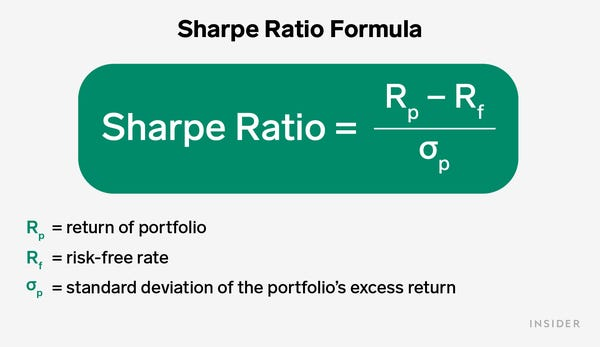

In this notebook, we will pull stock data using the yFinance package and calculate a mean-variance optimal portfolio using the PyPortfolioOpt package.


* we don't allow shorting (weights are between 0 and 1)
* risk free rate = 2%
* Investment=100 000$
* stocks:

EA    : Electronic Arts  

AAPL  : Apple Inc

WMT   : Walmart

XOM   : ExxonMobil

JPM   : JPMorgan Chase

JNJ   : Johnson & Johnson

FDX   : FedEx

NKE   : Nike, Inc

AMT   : American Tower

ETR   : Entergy

TSLA  : Tesla

Plan

1- Install yfinance , PyPortfolioOpt and load libraries

2- Download Stock Price Data

3- Correlation Matrix

4- Risk and return

5- Optimal Portfolio with min volatility

6- Optimal Portfolio with Max Sharpe Ratio

7- Plot Efficient Frontier,Max Sharpe Portfolio and Min Volatility Portfolio

8- Discrete Allocation



# **1.   Install yfinance , PyPortfolioOpt and load libraries**




In [1]:
!pip install yfinance
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(10,6)





# **2.   Download Stock Price  Data**



In [3]:
investment=100000

tickers=['EA','AAPL','WMT','XOM','JPM','JNJ','FDX','NKE','AMT','ETR','TSLA']

In [4]:
stocks_prices = pd.DataFrame({'A' : []})
stocks_info = pd.DataFrame({'A' : []})

for i,ticker in enumerate(tickers):
  print(i,ticker)

  yticker = yf.Ticker(ticker)

  # Get 5y history of prices

  historyPrices = yticker.history(period='5y')

  historyPrices['Ticker'] = ticker
  
  historyPrices['Date'] = historyPrices.index.date
   

  if stocks_prices.empty:
    stocks_prices = historyPrices
  else:
    stocks_prices = pd.concat([stocks_prices,historyPrices], ignore_index=True).drop(['Dividends','Stock Splits'],axis=1)

0 EA
1 AAPL
2 WMT
3 XOM
4 JPM
5 JNJ
6 FDX
7 NKE
8 AMT
9 ETR
10 TSLA


In [5]:
stocks_prices

,Open,High,Low,Close,Volume,Ticker,Date
0,117.944090,119.172982,115.020507,116.546715,8953500,EA,2017-07-27
1,112.978968,117.686424,112.483446,117.190903,5012300,EA,2017-07-28
2,117.983736,118.181941,115.456572,115.694420,2951400,EA,2017-07-31
3,116.516990,116.596275,115.397114,115.872810,2488200,EA,2017-08-01
4,116.061114,116.368335,112.810492,115.783623,3111600,EA,2017-08-02
...,...,...,...,...,...,...,...
13844,765.320007,819.799988,764.599976,815.119995,47344100,TSLA,2022-07-21
13845,828.659973,842.359985,812.140015,816.729980,34421200,TSLA,2022-07-22
13846,816.650024,822.440002,802.200012,805.299988,21357800,TSLA,2022-07-25
13847,799.539978,801.929993,768.789978,776.580017,22149000,TSLA,2022-07-26


In [6]:
df = stocks_prices.pivot('Date','Ticker','Close')

df.head()

Ticker,AAPL,AMT,EA,ETR,FDX,JNJ,JPM,NKE,TSLA,WMT,XOM
Date,,,,,,,,,,,
2017-07-27,35.632511,122.156723,116.546715,62.825947,194.487885,114.706268,79.441368,55.300472,66.891998,72.560196,62.076996
2017-07-28,35.381645,125.308914,117.190903,62.908440,194.956436,115.600578,79.207085,55.794983,67.014000,72.587479,61.132332
2017-07-31,35.199413,123.488281,115.694420,63.296207,194.947083,116.363342,79.658302,56.156361,64.694000,72.751198,61.470272
2017-08-01,35.511818,123.162193,115.872810,63.650948,193.710114,116.179222,80.725624,56.907650,63.914001,73.215065,61.570114
2017-08-02,37.189774,124.973770,115.783623,63.139446,196.324615,115.872375,80.795029,56.860104,65.178001,73.242332,61.900364


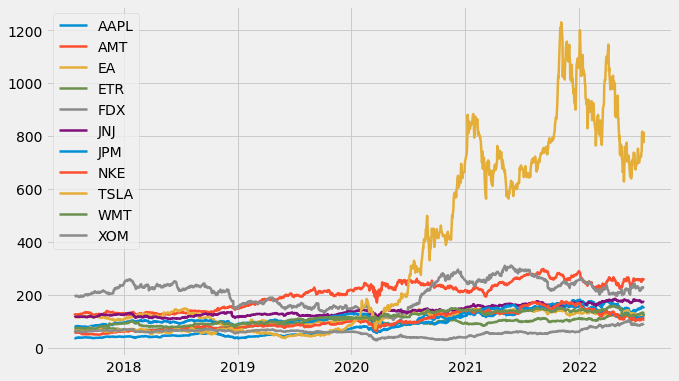

In [7]:
plt.plot(df,linewidth=2.5)

plt.legend(df.columns)




# **3.   Correlation Matrix**





In [8]:
df.corr()

Ticker,AAPL,AMT,EA,ETR,FDX,JNJ,JPM,NKE,TSLA,WMT,XOM
Ticker,,,,,,,,,,,
AAPL,1.000000,0.839198,0.654682,0.721483,0.487261,0.940500,0.793083,0.923350,0.965154,0.911187,0.062582
AMT,0.839198,1.000000,0.410751,0.869628,0.116686,0.820540,0.680915,0.852048,0.739075,0.910270,-0.165034
EA,0.654682,0.410751,1.000000,0.176835,0.674743,0.553108,0.521826,0.593901,0.653684,0.497013,-0.073982
ETR,0.721483,0.869628,0.176835,1.000000,-0.022005,0.738194,0.628617,0.697823,0.608056,0.803660,0.064052
FDX,0.487261,0.116686,0.674743,-0.022005,1.000000,0.425049,0.522278,0.496108,0.550037,0.328803,0.102585
JNJ,0.940500,0.820540,0.553108,0.738194,0.425049,1.000000,0.766922,0.844221,0.907437,0.862905,0.206734
JPM,0.793083,0.680915,0.521826,0.628617,0.522278,0.766922,1.000000,0.870191,0.807917,0.723981,0.176501
NKE,0.923350,0.852048,0.593901,0.697823,0.496108,0.844221,0.870191,1.000000,0.897275,0.909527,-0.096988
TSLA,0.965154,0.739075,0.653684,0.608056,0.550037,0.907437,0.807917,0.897275,1.000000,0.843909,0.137586


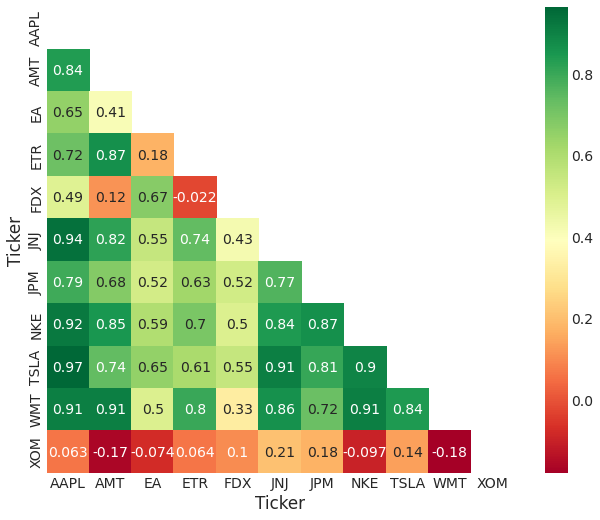

In [9]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdYlGn')





# **4.   Risk and return**




### a)     Return 












*   return models









In [10]:
from pypfopt import expected_returns,EfficientFrontier

In [11]:
past_df, future_df = df.iloc[:-600], df.iloc[-600:]

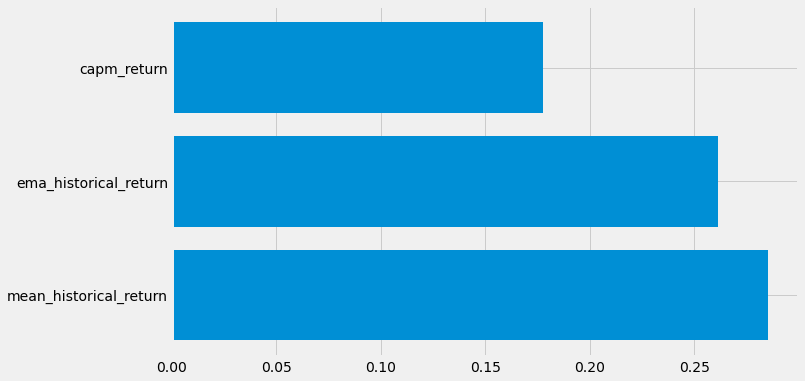

In [12]:
future_rets = expected_returns.mean_historical_return(future_df)

mean_abs_errors_exp_return = []

return_methods = [
    "mean_historical_return",           #estimators
    "ema_historical_return",
    "capm_return",]

for method in return_methods:

    mu = expected_returns.return_model(past_df, method=method)
    
    mean_abs_errors_exp_return.append(np.sum(np.abs(mu - future_rets)) / len(mu))
    
xrange = range(len(mean_abs_errors_exp_return))
plt.barh(xrange, mean_abs_errors_exp_return)
plt.yticks(xrange, return_methods)
plt.show()

In [13]:
for i in mean_abs_errors_exp_return:
    print("{:.3%}".format(i))

28.536%
26.118%
17.778%


The CAPM is  the better estimator with the minimum mae=17%







*   calculating expected returns




In [14]:
mu=expected_returns.capm_return(df,risk_free_rate=0.02)

print(f'Expected returns for each stock: {mu} \n')

Expected returns for each stock: Ticker
AAPL    0.231364
AMT     0.168519
EA      0.162347
ETR     0.159828
FDX     0.228531
JNJ     0.126710
JPM     0.215890
NKE     0.209354
TSLA    0.361136
WMT     0.121889
XOM     0.193204
Name: mkt, dtype: float64 



### b) Risk












*   Risk models



In [15]:
from pypfopt import risk_models

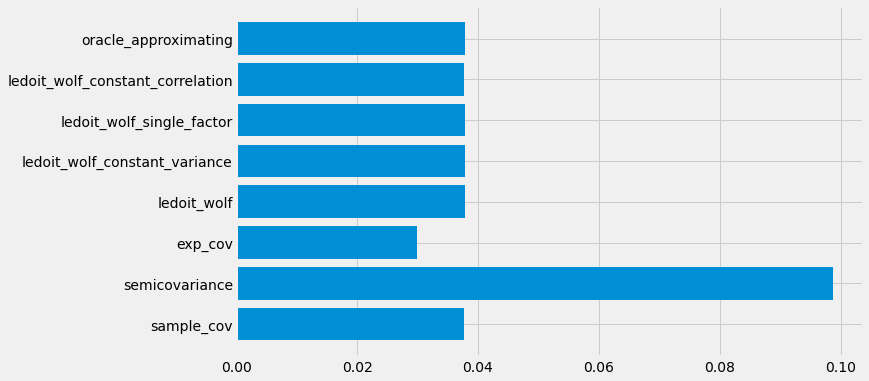

In [19]:
future_cov = risk_models.sample_cov(future_df)

future_variance = np.diag(future_cov)

mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:

    S = risk_models.risk_matrix(df, method=method)

    variance = np.diag(S)
    
    mean_abs_errors.append(np.sum(np.abs(variance - future_variance)) / len(variance))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

In [20]:
for i in mean_abs_errors:
     print("{:.3%}".format(i))

3.770%
9.871%
2.995%
3.784%
3.784%
3.777%
3.770%
3.779%


We can see that the exponential covariance matrix is a much better estimator of future variance compared to the other models. Its mean absolute error is 3%, which is actually very good.



*   Variance-Covariance Matrix



In [21]:
S = risk_models.exp_cov(df)
S

Ticker,AAPL,AMT,EA,ETR,FDX,JNJ,JPM,NKE,TSLA,WMT,XOM
Ticker,,,,,,,,,,,
AAPL,0.110638,0.041715,0.032351,0.017516,0.066897,0.019520,0.052929,0.088569,0.156459,0.028911,0.024568
AMT,0.041715,0.086119,0.027351,0.032237,0.022615,0.024078,0.033200,0.039963,0.049140,0.015776,0.014394
EA,0.032351,0.027351,0.072904,0.009490,0.026745,0.009731,0.027502,0.043184,0.053268,0.007523,0.017300
ETR,0.017516,0.032237,0.009490,0.055632,0.010825,0.020211,0.018727,0.015197,0.005908,0.016097,0.027968
FDX,0.066897,0.022615,0.026745,0.010825,0.162218,0.007641,0.056345,0.081659,0.105917,0.014911,0.023335
JNJ,0.019520,0.024078,0.009731,0.020211,0.007641,0.031492,0.016813,0.015274,0.008721,0.014722,0.004581
JPM,0.052929,0.033200,0.027502,0.018727,0.056345,0.016813,0.085236,0.061342,0.080647,0.014142,0.035499
NKE,0.088569,0.039963,0.043184,0.015197,0.081659,0.015274,0.061342,0.151789,0.146065,0.031292,0.029072
TSLA,0.156459,0.049140,0.053268,0.005908,0.105917,0.008721,0.080647,0.146065,0.450193,0.037712,0.042165





# **5.   Optimal Portfolio with min volatility**




Portfolio weights for min volatility optimisation (lowest level of risk): {
    "AAPL": 0.0,
    "AMT": 0.0,
    "EA": 0.16327,
    "ETR": 0.08874,
    "FDX": 0.05177,
    "JNJ": 0.4874,
    "JPM": 0.0,
    "NKE": 0.0,
    "TSLA": 0.0,
    "WMT": 0.12058,
    "XOM": 0.08824
} 

Expected annual return: 14.6%
Annual volatility: 14.6%
Sharpe Ratio: 0.86
Portfolio performance: (0.1460245449857796, 0.14596684022041076, 0.8633779068964008) 



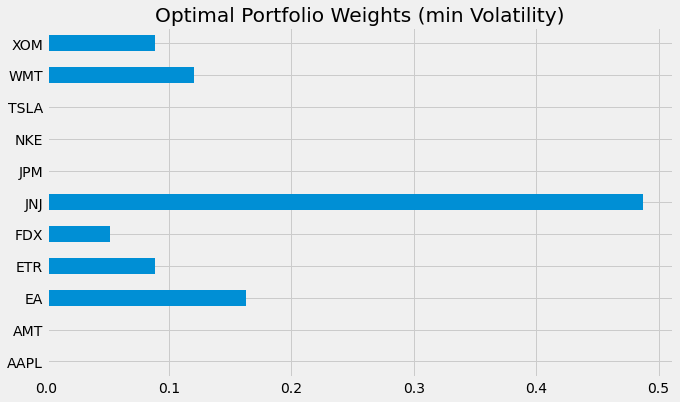

In [22]:
import json                                          # json: https://stackoverflow.com/questions/44689546/how-to-print-out-a-dictionary-nicely-in-python/44689627

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))  # Weights between 0 and 1 - we don't allow shorting

ef_min_volatility=ef.min_volatility()

weights_min_volatility = ef.clean_weights()

print(f'Portfolio weights for min volatility optimisation (lowest level of risk): {json.dumps(weights_min_volatility, indent=4, sort_keys=True)} \n')

print(f'Portfolio performance: {ef.portfolio_performance(verbose=True, risk_free_rate=0.02)} \n')

pd.Series(weights_min_volatility).plot.barh(title = 'Optimal Portfolio Weights (min Volatility)')





# **6.   Optimal Portfolio with Max Sharpe Ratio**



Portfolio weights for max Sharpe optimisation (highest return-per-risk): {
    "AAPL": 0.0,
    "AMT": 0.0,
    "EA": 0.13643,
    "ETR": 0.18378,
    "FDX": 0.08471,
    "JNJ": 0.30241,
    "JPM": 0.09451,
    "NKE": 0.0,
    "TSLA": 0.05646,
    "WMT": 0.04383,
    "XOM": 0.09789
} 

Expected annual return: 17.4%
Annual volatility: 16.3%
Sharpe Ratio: 0.95
Portfolio performance: (0.17424432305264792, 0.1630280285101343, 0.9461215010832303) 



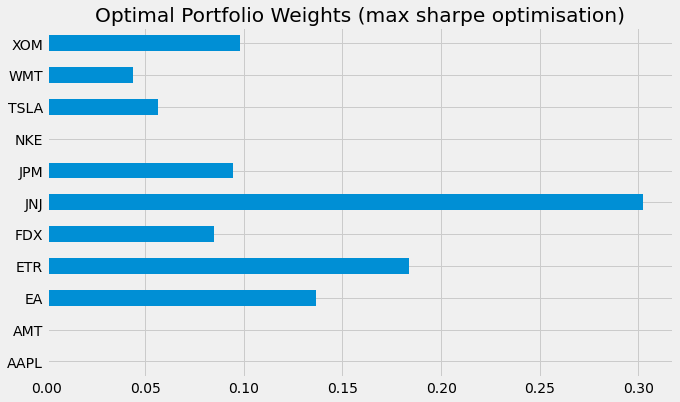

In [23]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))

ef.max_sharpe()

weights_max_sharpe = ef.clean_weights()

print(f'Portfolio weights for max Sharpe optimisation (highest return-per-risk): {json.dumps(weights_max_sharpe, indent=4, sort_keys=True)} \n')

print(f'Portfolio performance: {ef.portfolio_performance(verbose=True, risk_free_rate=0.02)} \n')

pd.Series(weights_max_sharpe).plot.barh(title = 'Optimal Portfolio Weights (max sharpe optimisation)')


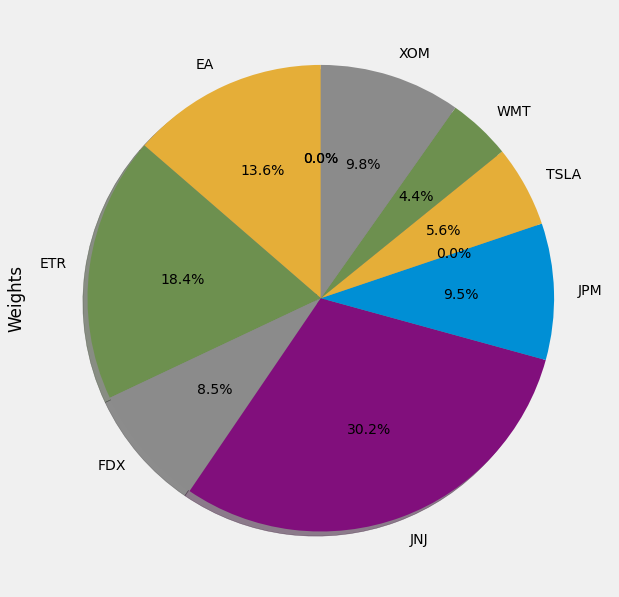

In [24]:


weights_max_sharpe = ef.clean_weights()
fig = plt.figure(figsize=(10, 10))
pd.Series(weights_max_sharpe).plot.pie(label='Weights',autopct='%1.01f%%',shadow=True, startangle=90)







# **7.   Plot Efficient Frontier,Max Sharpe Portfolio and Min Volatility Portfolio**



In [25]:
from pypfopt import  plotting

In [26]:
#generate 10 000 simulated portfolios with a sample random weights from the Dirichlet distribution (these are already normalised)
n_samples = 10000

w = np.random.dirichlet(np.ones(len(mu)), n_samples)

rets = w.dot(mu)

stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))

sharpes = rets / stds

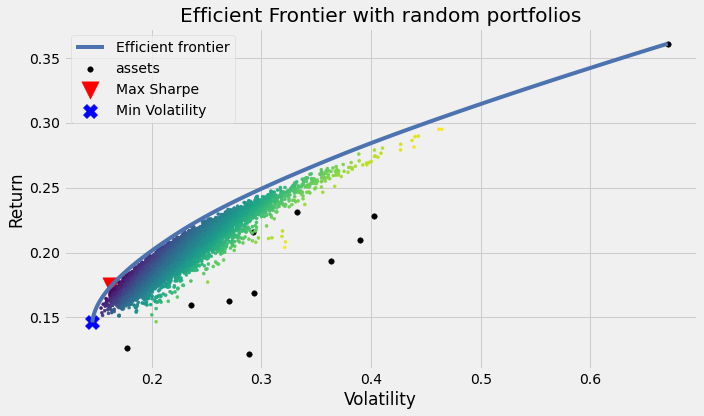

In [27]:
from numpy.core.function_base import linspace
from IPython.core.pylabtools import figsize

# Plot efficient frontier with Monte Carlo sim

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()

plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find and plot the tangency (Max Sharpe Portfolio)

ef = EfficientFrontier(mu, S)

ef.max_sharpe()

ret_tangent, std_tangent, _ = ef.portfolio_performance()

plt.scatter(std_tangent, ret_tangent, marker="v", s=300, c="r",label="Max Sharpe")

#Find and plot the Min Volatility Portfolio
ef = EfficientFrontier(mu, S)

ef.min_volatility()

ret_min_volatility,std_min_volatility,_=ef.portfolio_performance()

ax.scatter(std_min_volatility, ret_min_volatility, marker="X", s=200, c="b", label="Min Volatility")

# Plot random portfolios

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format

ax.set_title("Efficient Frontier with random portfolios")

ax.legend()
plt.tight_layout()
plt.show()




# 8.   Discrete Allocation



Oftentimes, you don't have enough money to replicate the exact 'optimal' weights. So you need to find the closest possible portfolio with undivided amount of stocks

In [28]:
from pypfopt import DiscreteAllocation,get_latest_prices

latest_prices = get_latest_prices(df)

da = DiscreteAllocation(weights_max_sharpe, latest_prices, total_portfolio_value = investment, short_ratio=0.0)

alloc, leftover = da.lp_portfolio()

print(f"Discrete allocation for the initial investment ${investment} performed with ${leftover:.2f} leftover")
alloc

Discrete allocation for the initial investment $100000 performed with $74.87 leftover


{'EA': 103,
 'ETR': 166,
 'FDX': 38,
 'JNJ': 175,
 'JPM': 83,
 'TSLA': 7,
 'WMT': 35,
 'XOM': 108}